In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [11]:
df = pd.read_csv("../data/processed/processed_data.csv")
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,19,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,41,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,46,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,22,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,22,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


In [12]:
X = df.drop('class', axis=1)
y = df['class']

Scaling and PCA (for Visualization)

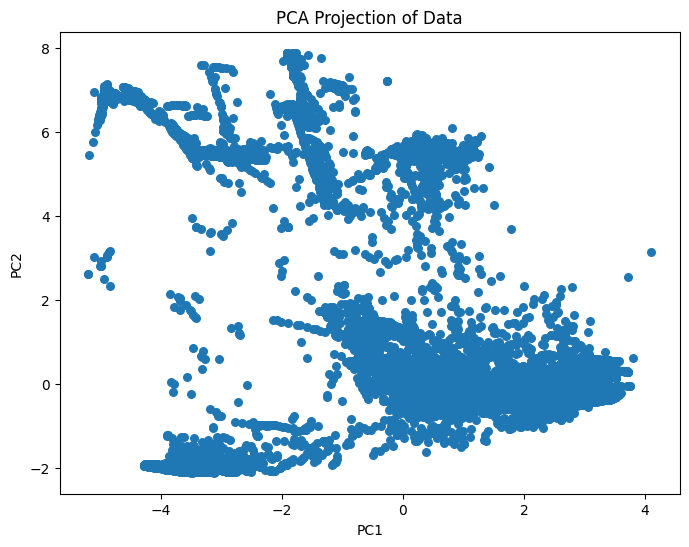

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], s=30)
plt.title("PCA Projection of Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

Kmeans Clustering

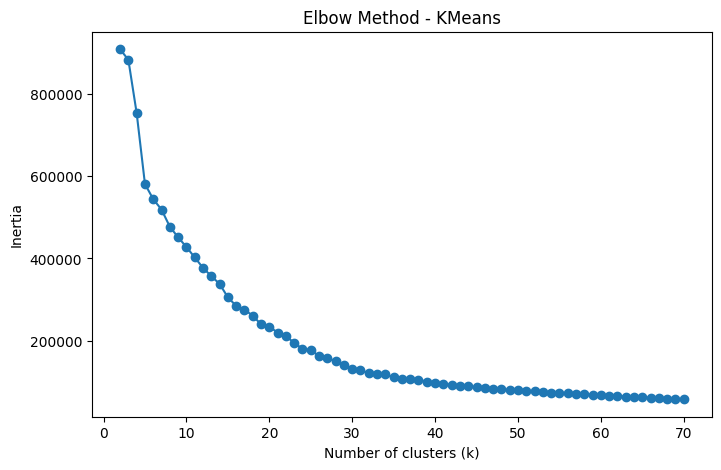

In [20]:
inertia = []
k_range = range(2,71)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method - KMeans")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.show()

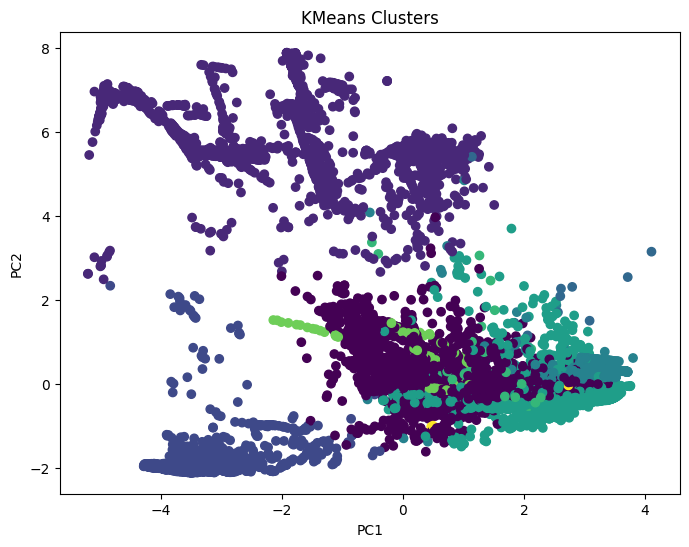

Silhouette Score for KMean: 0.4107450473695967


In [21]:
kmeans = KMeans(n_clusters=10, random_state=42)
label_kmeans = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=label_kmeans, cmap='viridis')
plt.title("KMeans Clusters")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

print(f'Silhouette Score for KMean: {silhouette_score(X_scaled, label_kmeans)}')

DBSCAN clustering

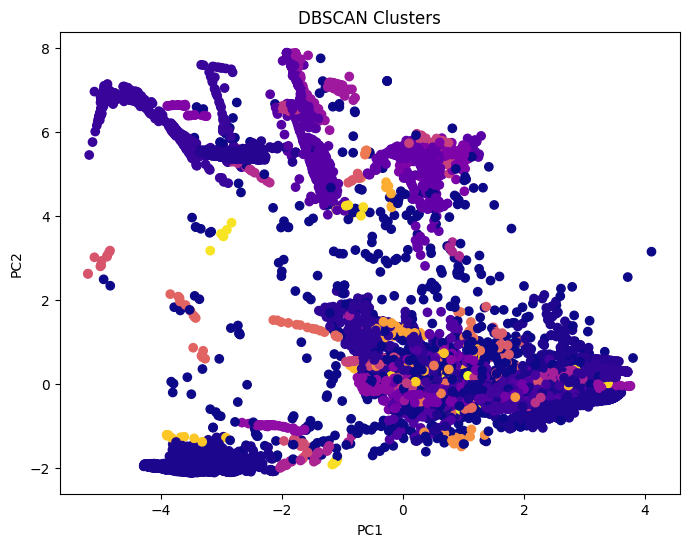

DBSCAN didn't find the valid clustering to score


In [23]:
dbscan = DBSCAN(eps=1.2, min_samples=5)
label_dbscan = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=label_dbscan, cmap='plasma')
plt.title("DBSCAN Clusters")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

if len(set(label_dbscan)) > 1 and -1 not in set(label_dbscan):
    print(f'silhouette score for DBSCAN: {silhouette_score(X_scaled, label_dbscan)}')
else:
    print("DBSCAN didn't find the valid clustering to score")    